In [1]:
import sys
sys.path.insert(0, "./../../scripts")

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import ricciardi as ric
import dmft

In [3]:
plt.rcParams["font.sans-serif"] = ["PT Sans","DejaVu Sans"]

# Plot Interocular Linear Response Statistics from Fig 6a,b

In [4]:
sing_oris = [130]

sim_sing_dr = np.array([2.8632733 , 0.46012648, 0.31349788, 0.13982971, 0.05703189, 0.02666332])
sim_sing_dstdr = np.array([15.64064821, 10.74145532,  9.67937987,  8.40606301,  7.96817521, 7.86632242])
sim_sing_drE = [-0.85377538]
sim_sing_drI = [3.54841811]
sim_sing_dstdrE = [9.19161213]
sim_sing_dstdrI = [6.46920774]

In [ ]:
nori = 20

sim_dr = np.zeros(6)
sim_dstdr = np.zeros(6)
sim_rvE = np.zeros(nori)
sim_rvI = np.zeros(nori)
sim_roE = np.zeros(nori)
sim_roI = np.zeros(nori)
sim_std_rvE = np.zeros(nori)
sim_std_rvI = np.zeros(nori)
sim_std_roE = np.zeros(nori)
sim_std_roI = np.zeros(nori)

sim_μrEs = np.zeros((6,3,nori))
sim_μrIs = np.zeros((6,3,nori))
sim_ΣrEs = np.zeros((6,4,nori))
sim_ΣrIs = np.zeros((6,4,nori))

for c_idx in range(6):
    with open("./../../model_data/opto_norm_c1_{:d}_c2_{:d}".format(c_idx,c_idx)+".pkl","rb") as handle:
        res_dict = pickle.load(handle)
        
    sim_dr[c_idx] = res_dict["vsm1_opto_means"] - res_dict["vsm1_base_means"]
    sim_dstdr[c_idx] = res_dict["vsm1_opto_stds"] - res_dict["vsm1_base_stds"]
        
    if c_idx == 5:
        sim_μrEs = np.mean(res_dict["μrEs"],0)
        sim_μrIs = np.mean(res_dict["μrIs"],0)
        sim_ΣrEs = np.mean(res_dict["ΣrEs"],0)
        sim_ΣrIs = np.mean(res_dict["ΣrIs"],0)
        
        sim_rvE[:] = sim_μrEs[0]
        sim_rvI[:] = sim_μrIs[0]
        sim_roE[:] = sim_μrEs[1]
        sim_roI[:] = sim_μrIs[1]
        sim_std_rvE[:] = np.sqrt(sim_ΣrEs[0])
        sim_std_rvI[:] = np.sqrt(sim_ΣrIs[0])
        sim_std_roE[:] = np.sqrt(sim_ΣrEs[1])
        sim_std_roI[:] = np.sqrt(sim_ΣrIs[1])

In [ ]:
with open("./../../model_data/best_fit.pkl", "rb") as handle:
    res_dict = pickle.load(handle)
prms = res_dict["prms"]
eX = res_dict["best_monk_eX"]
bX = res_dict["best_monk_bX"]
aXs = res_dict["best_monk_aXs"]

ri = ric.Ricciardi()
ri.set_up_nonlinearity("./../../model_data/phi_int")

tau = np.array([ri.tE,ri.tI],dtype=np.float32)
W = prms["J"]*np.array([[1,-prms["gE"]],[1./prms["beta"],-prms["gI"]/prms["beta"]]],dtype=np.float32)
Ks = np.array([prms["K"],prms["K"]/4],dtype=np.float32)
H = bX*prms["K"]*prms["J"]*np.array([prms["hE"],prms["hI"]/prms["beta"]],dtype=np.float32)
eH = eX

muH = tau*H
SigH = (muH*eH)**2

muW = tau[:,None]*W*Ks
SigW = tau[:,None]**2*W**2*Ks

sW = np.array([[prms["SoriE"],prms["SoriI"]],[prms["SoriE"],prms["SoriI"]]],dtype=np.float32)
sW2 = sW**2

dori = 45
xmatched = np.array([0,-dori])

Loading previously saved nonlinearity


In [7]:
FE,FI,ME,MI,CE,CI = dmft.base_itp_moments("./../../model_data")
FL,ML,CL = dmft.opto_itp_moments("./../../model_data",prms["L"],prms["CVL"])
    
def base_M(mui,Sigii,out):
    out[0] = ME(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    
def base_C(mui,Sigii,Sigij,out):
    out[0] = CE(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def opto_M(mui,Sigii,out):
    out[0] = ML(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    
def opto_C(mui,Sigii,Sigij,out):
    out[0] = CL(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]

def block_base_M(mui,Sigii,out):
    out[0] = ME(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    out[2] = ME(mui[2],Sigii[2])[0]
    out[3] = MI(mui[3],Sigii[3])[0]
    
def block_base_C(mui,Sigii,Sigij,out):
    out[0] = CE(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]
    out[2] = CE(mui[2],Sigii[2],Sigij[2])[0]
    out[3] = CI(mui[3],Sigii[3],Sigij[3])[0]

def block_opto_M(mui,Sigii,out):
    out[0] = ML(mui[0],Sigii[0])[0]
    out[1] = MI(mui[1],Sigii[1])[0]
    out[2] = ML(mui[2],Sigii[2])[0]
    out[3] = MI(mui[3],Sigii[3])[0]
    
def block_opto_C(mui,Sigii,Sigij,out):
    out[0] = CL(mui[0],Sigii[0],Sigij[0])[0]
    out[1] = CI(mui[1],Sigii[1],Sigij[1])[0]
    out[2] = CL(mui[2],Sigii[2],Sigij[2])[0]
    out[3] = CI(mui[3],Sigii[3],Sigij[3])[0]

In [ ]:
res_dict_inits = [None]*6
res_dict_perts = [None]*6

for c_idx in range(6):
    with open("./../../model_data/dmft_opto_norm_c_{:d}".format(c_idx)+".pkl","rb") as handle:
        this_res_dict = pickle.load(handle)["dmft_res"]
    if c_idx==0:
        res_dict_inits[c_idx] = {key: this_res_dict[key][:2] for key in ["r","Cr","mu","Sig"]}
        res_dict_perts[c_idx] = {key: this_res_dict[key][2:] for key in ["r","Cr","mu","Sig"]}
    else:
        res_dict_inits[c_idx] = {key: this_res_dict[key][:2] for key in ["rb","rm","sr","Crb","Crm","sCr",
                                                                         "mub","mum","Sigb","Sigm"]}
        res_dict_perts[c_idx] = {key: this_res_dict[key][2:] for key in ["rb","rm","sr","Crb","Crm","sCr",
                                                                         "mub","mum","Sigb","Sigm"]}

In [ ]:
Twrm = 1.2
Tsav = 0.4
dt = 0.01/5

res_dict_decoups = [None]*6

for c_idx in range(1,6):
    # res_dict_decoups[c_idx] = dmft.run_decoupled_three_site_dmft(prms,bX,aXs[c_idx]/bX,eX,"./../results",ri,
    #                                                              Twrm,Tsav,dt,
    #                                                            struct_dict=res_dict_inits[c_idx],
    #                                                            which="opto",couple_matched=True,return_full=True)
    # with open("./decoup_resp_2feat_c_{:d}.pkl".format(c_idx),"wb") as handle:
    #     pickle.dump(res_dict_decoups[c_idx],handle)
        
    with open("./../../model_data/decoup_resp_2feat_c_{:d}.pkl".format(c_idx),"rb") as handle:
        res_dict_decoups[c_idx] = pickle.load(handle)

In [ ]:
def calc_lin_resp(res_dict_init,res_dict_decoup,Tsav,dt,couple_matched=False):
    δrb0 = res_dict_decoup["rb"] - res_dict_init["rb"]
    δrm0 = res_dict_decoup["rm"] - res_dict_init["rm"]
    δCrb0 = res_dict_decoup["Crb"] - res_dict_init["Crb"]
    δCrm0 = res_dict_decoup["Crm"] - res_dict_init["Crm"]
    
    sr = res_dict_init["sr"]
    sCr = res_dict_init["sCr"][:,-1]
    
    sWr = np.sqrt(sW2+sr**2)
    sWCr = np.sqrt(sW2+sCr**2)
    rOinv = dmft.inv_overlap(xmatched,sr[:,None])[:,:,0]
    CrOinv = dmft.inv_overlap(xmatched,sCr[:,None])[:,:,0]

    muWbb = (1 - 2*dmft.struct_fact(180/2,sWr,sr,180)*np.sum(rOinv,-1)[None,:]) * muW 
    muWbp = dmft.struct_fact(180/2,sWr,sr,180)*np.sum(rOinv,-1)[None,:] * muW
    muWpb = (1 - (dmft.struct_fact(0,sWr,sr,180) + dmft.struct_fact(dori,sWr,sr,180))*np.sum(rOinv,-1)[None,:]) * muW
    muWps = (dmft.struct_fact(0,sWr,sr,180)*rOinv[None,:,0] + dmft.struct_fact(dori,sWr,sr,180)*rOinv[None,:,1]) * muW
    muWpc = (dmft.struct_fact(dori,sWr,sr,180)*rOinv[None,:,0] + dmft.struct_fact(0,sWr,sr,180)*rOinv[None,:,1]) * muW
    
    SigWbb = (1 - 2*dmft.struct_fact(180/2,sWCr,sCr,180)*np.sum(CrOinv,-1)[None,:]) * SigW
    SigWbp = dmft.struct_fact(180/2,sWCr,sCr,180)*np.sum(CrOinv,-1)[None,:] * SigW
    SigWpb = (1 - (dmft.struct_fact(0,sWCr,sCr,180) + dmft.struct_fact(dori,sWCr,sCr,180))*np.sum(CrOinv,-1)[None,:]) * SigW
    SigWps = (dmft.struct_fact(0,sWCr,sCr,180)*CrOinv[None,:,0] +\
        dmft.struct_fact(dori,sWCr,sCr,180)*CrOinv[None,:,1]) * SigW
    SigWpc = (dmft.struct_fact(dori,sWCr,sCr,180)*CrOinv[None,:,0] +\
        dmft.struct_fact(0,sWCr,sCr,180)*CrOinv[None,:,1]) * SigW

    δmb0 = np.concatenate([δrb0,δCrb0.flatten()])
    δmp0 = np.concatenate([δrm0,δCrm0.flatten()])

    if couple_matched:
        block_muW = np.block([
            [muWbb,2*muWbp],
            [muWpb,muWps+muWpc],
        ])
        block_SigW = np.block([
            [SigWbb,2*SigWbp],
            [SigWpb,SigWps+SigWpc],
        ])

        NP = 2
        NT = int(np.round(Tsav/dt)+1)

        block_mu = np.concatenate([res_dict_decoup["mub"],res_dict_decoup["mum"]])
        block_Sig = np.concatenate([res_dict_decoup["Sigb"],res_dict_decoup["Sigm"]],0)
        
        res_dict_lin_resp = dmft.lin_resp_mats(np.concatenate([tau,tau]),block_muW,block_SigW,
                                            np.zeros(4),np.zeros(4),block_opto_M,block_opto_C,Tsav,dt,
                                            block_mu,block_Sig)

        A = res_dict_lin_resp["A"]
        B = res_dict_lin_resp["B"]
        C = res_dict_lin_resp["C"]
        D = res_dict_lin_resp["D"]
        
        Abb,Abp,Apb,App = A[0:2,  0:2],  A[0:2,  2:4],  A[2:4,  0:2],  A[2:4,  2:4]
        Bbb,Bbp,Bpb,Bpp = B[0:2,  0:2,:],B[0:2,  2:4,:],B[2:4,  0:2,:],B[2:4,  2:4,:]
        Cbb,Cbp,Cpb,Cpp = C[0:2,:,0:2],  C[0:2,:,2:4],  C[2:4,:,0:2],  C[2:4,:,2:4]
        Dbb,Dbp,Dpb,Dpp = D[0:2,:,0:2,:],D[0:2,:,2:4,:],D[2:4,:,0:2,:],D[2:4,:,2:4,:]
    
        Mbb = np.block([[Abb,Bbb.reshape(NP,NP*NT)],[Cbb.reshape(NP*NT,NP),Dbb.reshape(NP*NT,NP*NT)]])
        Mbp = np.block([[Abp,Bbp.reshape(NP,NP*NT)],[Cbp.reshape(NP*NT,NP),Dbp.reshape(NP*NT,NP*NT)]])
        Mpb = np.block([[Apb,Bpb.reshape(NP,NP*NT)],[Cpb.reshape(NP*NT,NP),Dpb.reshape(NP*NT,NP*NT)]])
        Mpp = np.block([[App,Bpp.reshape(NP,NP*NT)],[Cpp.reshape(NP*NT,NP),Dpp.reshape(NP*NT,NP*NT)]])
        
        Xbp = -np.linalg.solve(Mbb,Mbp)
        Xpb = -np.linalg.solve(Mpp,Mpb)
        
        Xbp_mint = Xbp.copy()
        Xbp_mint[:2,2:] = 0
        Xpb_mint = Xpb.copy()
        Xpb_mint[:2,2:] = 0
        
        δm = np.concatenate([δmb0,
                             δmp0+Xpb@δmb0])
        δm1 = δm.copy()

        δm_mint = np.concatenate([δmb0,
                                 δmp0+Xpb_mint@δmb0])
        δm_mint1 = δm_mint.copy()
    else:
        block_muW = np.block([
            [muWbb,muWbp,muWbp],
            [muWpb,muWps,muWpc],
            [muWpb,muWpc,muWps]
        ])
        block_SigW = np.block([
            [SigWbb,SigWbp,SigWbp],
            [SigWpb,SigWps,SigWpc],
            [SigWpb,SigWpc,SigWps]
        ])

        NP = 2
        NT = int(np.round(Tsav/dt)+1)

        block_mu = np.concatenate([res_dict_decoup["mub"],res_dict_decoup["mum"],res_dict_decoup["mum"]])
        block_Sig = np.concatenate([res_dict_decoup["Sigb"],res_dict_decoup["Sigm"],res_dict_decoup["Sigm"]],0)
        
        res_dict_lin_resp = dmft.lin_resp_mats(np.concatenate([tau,tau,tau]),block_muW,block_SigW,
                                            np.zeros(6),np.zeros(6),block_opto_M,block_opto_C,Tsav,dt,
                                            block_mu,block_Sig)

        A = res_dict_lin_resp["A"]
        B = res_dict_lin_resp["B"]
        C = res_dict_lin_resp["C"]
        D = res_dict_lin_resp["D"]
        
        Abb,Abp,Apb,Aps,Apc = A[0:2,  0:2],  A[0:2,  2:4],  A[2:4,  0:2],  A[2:4,  2:4],  A[2:4,  4:6]
        Bbb,Bbp,Bpb,Bps,Bpc = B[0:2,  0:2,:],B[0:2,  2:4,:],B[2:4,  0:2,:],B[2:4,  2:4,:],B[2:4,  4:6,:]
        Cbb,Cbp,Cpb,Cps,Cpc = C[0:2,:,0:2],  C[0:2,:,2:4],  C[2:4,:,0:2],  C[2:4,:,2:4],  C[2:4,:,4:6]
        Dbb,Dbp,Dpb,Dps,Dpc = D[0:2,:,0:2,:],D[0:2,:,2:4,:],D[2:4,:,0:2,:],D[2:4,:,2:4,:],D[2:4,:,4:6,:]
    
        Mbb = np.block([[Abb,Bbb.reshape(NP,NP*NT)],[Cbb.reshape(NP*NT,NP),Dbb.reshape(NP*NT,NP*NT)]])
        Mbp = np.block([[Abp,Bbp.reshape(NP,NP*NT)],[Cbp.reshape(NP*NT,NP),Dbp.reshape(NP*NT,NP*NT)]])
        Mpb = np.block([[Apb,Bpb.reshape(NP,NP*NT)],[Cpb.reshape(NP*NT,NP),Dpb.reshape(NP*NT,NP*NT)]])
        Mps = np.block([[Aps,Bps.reshape(NP,NP*NT)],[Cps.reshape(NP*NT,NP),Dps.reshape(NP*NT,NP*NT)]])
        Mpc = np.block([[Apc,Bpc.reshape(NP,NP*NT)],[Cpc.reshape(NP*NT,NP),Dpc.reshape(NP*NT,NP*NT)]])
        
        Xbp = -np.linalg.solve(Mbb,Mbp)
        Xpb = -np.linalg.solve(Mps,Mpb)
        Xpc = -np.linalg.solve(Mps,Mpc)
        Xps = np.eye(NP*(NT+1)) + Xpc
        
        Xbp_mint = Xbp.copy()
        Xbp_mint[:2,2:] = 0
        Xpb_mint = Xpb.copy()
        Xpb_mint[:2,2:] = 0
        Xpc_mint = Xpc.copy()
        Xpc_mint[:2,2:] = 0
        Xps_mint = np.eye(NP*(NT+1)) + Xpc_mint
        
        δm = np.concatenate([δmb0,
                            δmp0+Xpb@δmb0+Xpc@δmp0])
        δm1 = np.concatenate([δmb0,
                            δmp0+Xps@(Xpb@δmb0+Xpc@δmp0)])
        
        δm_mint = np.concatenate([δmb0,
                                δmp0+Xpb_mint@δmb0+Xpc_mint@δmp0])
        δm_mint1 = np.concatenate([δmb0,
                                δmp0+Xps_mint@(Xpb_mint@δmb0+Xpc_mint@δmp0)])

    δmb = δm[:NP+NP*NT]
    δmp = δm[NP+NP*NT:]

    δmb1 = δm1[:NP+NP*NT]
    δmp1 = δm1[NP+NP*NT:]

    δmb_mint = δm_mint[:NP+NP*NT]
    δmp_mint = δm_mint[NP+NP*NT:]

    δmb_mint1 = δm_mint1[:NP+NP*NT]
    δmp_mint1 = δm_mint1[NP+NP*NT:]

    δrb = δmb[:NP]
    δCrb = δmb[NP:].reshape(NP,NT)
    δrm = δmp[:NP]
    δCrm = δmp[NP:].reshape(NP,NT)

    δrb1 = δmb1[:NP]
    δCrb1 = δmb1[NP:].reshape(NP,NT)
    δrm1 = δmp1[:NP]
    δCrm1 = δmp1[NP:].reshape(NP,NT)

    δrb_mint = δmb_mint[:NP]
    δCrb_mint = δmb_mint[NP:].reshape(NP,NT)
    δrm_mint = δmp_mint[:NP]
    δCrm_mint = δmp_mint[NP:].reshape(NP,NT)

    δrb_mint1 = δmb_mint1[:NP]
    δCrb_mint1 = δmb_mint1[NP:].reshape(NP,NT)
    δrm_mint1 = δmp_mint1[:NP]
    δCrm_mint1 = δmp_mint1[NP:].reshape(NP,NT)
    
    res_dict = {}
    
    res_dict["drb0"] = δrb0
    res_dict["drm0"] = δrm0
    res_dict["dCrb0"] = δCrb0
    res_dict["dCrm0"] = δCrm0
    res_dict["drb"] = δrb
    res_dict["drm"] = δrm
    res_dict["dCrb"] = δCrb
    res_dict["dCrm"] = δCrm
    res_dict["drb1"] = δrb1
    res_dict["drm1"] = δrm1
    res_dict["dCrb1"] = δCrb1
    res_dict["dCrm1"] = δCrm1
    res_dict["drb_mint"] = δrb_mint
    res_dict["drm_mint"] = δrm_mint
    res_dict["dCrb_mint"] = δCrb_mint
    res_dict["dCrm_mint"] = δCrm_mint
    res_dict["drb_mint1"] = δrb_mint1
    res_dict["drm_mint1"] = δrm_mint1
    res_dict["dCrb_mint1"] = δCrb_mint1
    res_dict["dCrm_mint1"] = δCrm_mint1
    
    return res_dict

In [ ]:
res_dict_lin_resps = [None]*6

for c_idx in range(1,6):
    res_dict_lin_resps[c_idx] = calc_lin_resp(res_dict_inits[c_idx],res_dict_decoups[c_idx],Tsav,dt,couple_matched=True)

In [12]:
dmft_dr = np.zeros(6)
dmft_dr0 = np.zeros(6)
dmft_drfull = np.zeros(6)
dmft_dr_mint = np.zeros(6)
dmft_dstdr = np.zeros(6)
dmft_dstdr0 = np.zeros(6)
dmft_dstdrfull = np.zeros(6)
dmft_dstdr_mint = np.zeros(6)

for c_idx in range(6):
    if c_idx==0:
        dmft_dr[c_idx] = np.sum(np.array([0.8,0.2])*(res_dict_perts[c_idx]["r"] - res_dict_inits[c_idx]["r"]))
        dmft_dr0[c_idx] = np.nan
        dmft_drfull[c_idx] = np.nan
        dmft_dr_mint[c_idx] = np.nan
        
        dmft_dstdr[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_perts[c_idx]["Cr"],1,dt)-res_dict_perts[c_idx]["r"]**2))) -\
            np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Cr"],1,dt)-res_dict_inits[c_idx]["r"]**2)))
        dmft_dstdr0[c_idx] = np.nan
        dmft_dstdrfull[c_idx] = np.nan
        dmft_dstdr_mint[c_idx] = np.nan
    else:
        dmft_dr[c_idx] = np.sum(np.array([0.8,0.2])*(res_dict_perts[c_idx]["rm"] - res_dict_inits[c_idx]["rm"]))
        dmft_dr0[c_idx] = np.sum(np.array([0.8,0.2])*res_dict_lin_resps[c_idx]["drm0"])
        dmft_drfull[c_idx] = np.sum(np.array([0.8,0.2])*res_dict_lin_resps[c_idx]["drm"])
        dmft_dr_mint[c_idx] = np.sum(np.array([0.8,0.2])*res_dict_lin_resps[c_idx]["drm_mint"])
        
        init_varr = np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Crm"],1,dt)-res_dict_inits[c_idx]["rm"]**2))
        dmft_dstdr[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_perts[c_idx]["Crm"],1,dt)-res_dict_perts[c_idx]["rm"]**2))) -\
            np.sqrt(init_varr)
        dmft_dstdr0[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_decoups[c_idx]["Crm"],1,dt)-res_dict_decoups[c_idx]["rm"]**2))) -\
            np.sqrt(init_varr)
        dmft_dstdrfull[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Crm"]+res_dict_lin_resps[c_idx]["dCrm"],1,dt)-\
            (res_dict_inits[c_idx]["rm"]+res_dict_lin_resps[c_idx]["drm"])**2))) -\
            np.sqrt(init_varr)
        dmft_dstdr_mint[c_idx] = np.sqrt(np.sum(np.array([0.8,0.2])*\
            (dmft.grid_stat(np.mean,res_dict_inits[c_idx]["Crm"]+res_dict_lin_resps[c_idx]["dCrm_mint"],1,dt)-\
            (res_dict_inits[c_idx]["rm"]+res_dict_lin_resps[c_idx]["drm_mint"])**2))) -\
            np.sqrt(init_varr)

In [ ]:
oris = np.arange(nori*3//4+1) * 90/(nori/2)
def gauss(x,b,p,s):
    if np.isscalar(s):
        amp = (p-b)*np.sum(dmft.inv_overlap(xmatched,s*np.ones((1))[:,None])[:,:,0],-1)
    else:
        amp = (p-b)*np.sum(dmft.inv_overlap(xmatched,s[:,None])[:,:,0],-1)
    return b + amp*dmft.basesubwrapnorm(x,s) + amp*dmft.basesubwrapnorm(x-dori,s)

sr = res_dict_inits[5]["sr"]
rvb = res_dict_inits[5]["rb"]
rvp = res_dict_inits[5]["rm"]
rob = res_dict_perts[5]["rb"]
rop = res_dict_perts[5]["rm"]

sCr = res_dict_inits[5]["sCr"][:,-1]
Crvb = dmft.grid_stat(np.mean,res_dict_inits[5]["Crb"],1,dt)
Crvp = dmft.grid_stat(np.mean,res_dict_inits[5]["Crm"],1,dt)
Crob = dmft.grid_stat(np.mean,res_dict_perts[5]["Crb"],1,dt)
Crop = dmft.grid_stat(np.mean,res_dict_perts[5]["Crm"],1,dt)

drb = res_dict_lin_resps[5]["drb"]
drm = res_dict_lin_resps[5]["drm"]
drb0 = res_dict_lin_resps[5]["drb0"]
drm0 = res_dict_lin_resps[5]["drm0"]
drb_mint = res_dict_lin_resps[5]["drb_mint"]
drm_mint = res_dict_lin_resps[5]["drm_mint"]
dCrb = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrb"],1,dt)
dCrm = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrm"],1,dt)
dCrb0 = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrb0"],1,dt)
dCrm0 = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrm0"],1,dt)
dCrb_mint = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrb_mint"],1,dt)
dCrm_mint = dmft.grid_stat(np.mean,res_dict_lin_resps[5]["dCrm_mint"],1,dt)

rvE = gauss(oris,rvb[0],rvp[0],sr[0])
rvI = gauss(oris,rvb[1],rvp[1],sr[1])
roE = gauss(oris,rob[0],rop[0],sr[0])
roI = gauss(oris,rob[1],rop[1],sr[1])

CrvE = gauss(oris,Crvb[0],Crvp[0],sCr[0])
CrvI = gauss(oris,Crvb[1],Crvp[1],sCr[1])
CroE = gauss(oris,Crob[0],Crop[0],sCr[0])
CroI = gauss(oris,Crob[1],Crop[1],sCr[1])

drE = gauss(oris,drb[0],drm[0],sr[0])
drI = gauss(oris,drb[1],drm[1],sr[1])
drE0 = gauss(oris,drb0[0],drm0[0],sr[0])
drI0 = gauss(oris,drb0[1],drm0[1],sr[1])
drE_mint = gauss(oris,drb_mint[0],drm_mint[0],sr[0])
drI_mint = gauss(oris,drb_mint[1],drm_mint[1],sr[1])

dCrE = gauss(oris,dCrb[0],dCrm[0],sCr[0])
dCrI = gauss(oris,dCrb[1],dCrm[1],sCr[1])
dCrE0 = gauss(oris,dCrb0[0],dCrm0[0],sCr[0])
dCrI0 = gauss(oris,dCrb0[1],dCrm0[1],sCr[1])
dCrE_mint = gauss(oris,dCrb_mint[0],dCrm_mint[0],sCr[0])
dCrI_mint = gauss(oris,dCrb_mint[1],dCrm_mint[1],sCr[1])

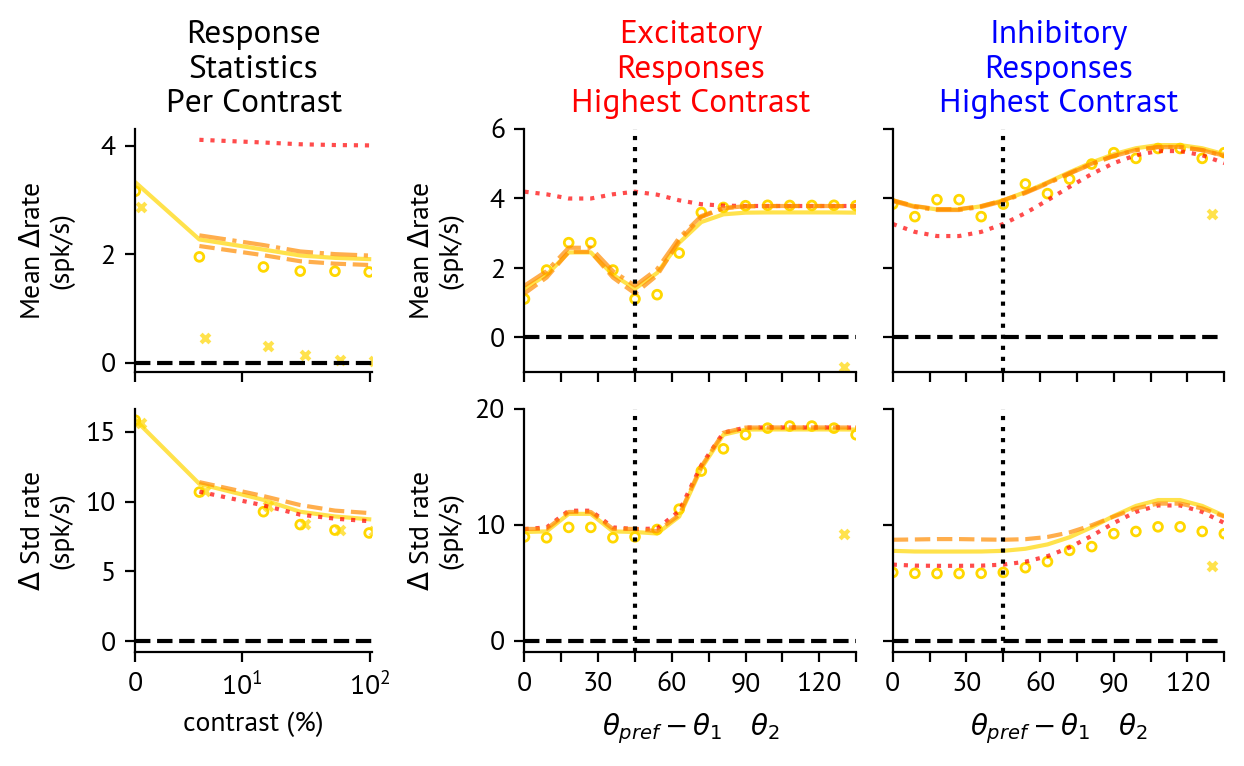

In [14]:
with open("./../../experimental_data/data_contrasts"+".pkl", "rb") as handle:
    cons = pickle.load(handle)[1]
shift_cons = cons.copy()
shift_cons[shift_cons <  12] += 0.5
shift_cons[shift_cons >= 12] *= 1.1

def abs_ori(A):
    return 0.5*(A[:nori*3//4+1]+np.roll(A[-1::-1],6,0)[:nori*3//4+1])

fig,axs = plt.subplots(2,4,figsize=(1.7*4.133,1.7*2),dpi=200,sharex="col",width_ratios=(3,1,4.2,4.2))
fig.subplots_adjust(hspace=0.15,wspace=0.15)
for i in range(2):
    axs[i,1].set_axis_off()
    axs[i,2].yaxis.set_tick_params(which="both",labelleft=True)
    axs[i,3].yaxis.set_tick_params(which="both",labelleft=False)
axs = axs[:,[0,2,3]]

axs[0,0].scatter(cons,sim_dr,edgecolors="gold",facecolors="none",marker="o",s=10)
axs[0,0].scatter(shift_cons,sim_sing_dr,facecolors="gold",marker="x",s=10,alpha=0.7)
axs[0,0].plot(cons,dmft_dr,c="gold",ls="-",alpha=0.7,label="a")
axs[0,0].plot(cons,dmft_dr0,c="red",ls=":",alpha=0.7,label="a")
axs[0,0].plot(cons,dmft_drfull,c="darkorange",ls="--",alpha=0.7,label="a")
axs[0,0].plot(cons,dmft_dr_mint,c="darkorange",ls="-.",alpha=0.7,label="a")
axs[0,1].plot(oris,roE-rvE,c="gold",ls="-",alpha=0.7,label="a")
axs[0,1].plot(oris,drE0,c="red",ls=":",alpha=0.7,label="a")
axs[0,1].plot(oris,drE,c="darkorange",ls="--",alpha=0.7,label="a")
axs[0,1].plot(oris,drE_mint,c="darkorange",ls="-.",alpha=0.7,label="a")
axs[0,1].scatter(oris,abs_ori(sim_roE-sim_rvE),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[0,1].scatter(sing_oris,sim_sing_drE,facecolors="gold",marker="x",s=10,alpha=0.7)
axs[0,2].plot(oris,roI-rvI,c="gold",ls="-",alpha=0.7)
axs[0,2].plot(oris,drI0,c="red",ls=":",alpha=0.7)
axs[0,2].plot(oris,drI,c="darkorange",ls="--",alpha=0.7)
axs[0,2].plot(oris,drI_mint,c="darkorange",ls="-.",alpha=0.7)
axs[0,2].scatter(oris,abs_ori(sim_roI-sim_rvI),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[0,2].scatter(sing_oris,sim_sing_drI,facecolors="gold",marker="x",s=10,alpha=0.7)
axs[1,0].scatter(cons,sim_dstdr,edgecolors="gold",facecolors="none",marker="o",s=10)
axs[1,0].scatter(shift_cons,sim_sing_dstdr,facecolors="gold",marker="x",s=10,alpha=0.7)
axs[1,0].plot(cons,dmft_dstdr,c="gold",ls="-",alpha=0.7,label="a")
axs[1,0].plot(cons,dmft_dstdr0,c="red",ls=":",alpha=0.7,label="a")
axs[1,0].plot(cons,dmft_dstdrfull,c="darkorange",ls="--",alpha=0.7,label="a")
axs[1,1].plot(oris,np.sqrt(CroE-roE**2)-np.sqrt(CrvE-rvE**2),c="gold",ls="-",alpha=0.7)
axs[1,1].plot(oris,np.sqrt(CrvE+dCrE0-(rvE+drE0)**2)-np.sqrt(CrvE-rvE**2),c="red",ls=":",alpha=0.7)
axs[1,1].plot(oris,np.sqrt(CrvE+dCrE-(rvE+drE)**2)-np.sqrt(CrvE-rvE**2),c="darkorange",ls="--",alpha=0.7)
axs[1,1].scatter(oris,abs_ori(sim_std_roE-sim_std_rvE),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[1,1].scatter(sing_oris,sim_sing_dstdrE,facecolors="gold",marker="x",s=10,alpha=0.7)
axs[1,2].plot(oris,np.sqrt(CroI-roI**2)-np.sqrt(CrvI-rvI**2),c="gold",ls="-",alpha=0.7)
axs[1,2].plot(oris,np.sqrt(CrvI+dCrI0-(rvI+drI0)**2)-np.sqrt(CrvI-rvI**2),c="red",ls=":",alpha=0.7)
axs[1,2].plot(oris,np.sqrt(CrvI+dCrI-(rvI+drI)**2)-np.sqrt(CrvI-rvI**2),c="darkorange",ls="--",alpha=0.7)
axs[1,2].scatter(oris,abs_ori(sim_std_roI-sim_std_rvI),edgecolors="gold",facecolors="none",marker="o",s=10)
axs[1,2].scatter(sing_oris,sim_sing_dstdrI,facecolors="gold",marker="x",s=10,alpha=0.7)

for i in range(2):
    for j in range(3):
        axs[i,j].axhline(0,c="k",ls="--")

for ax in axs.flat:
    ax.spines[["right", "top"]].set_visible(False)

axs[0,0].set_xscale("symlog", linthresh=12)
nticks = 10
ticks = np.array(["{:.0f}".format(ori) for ori in np.linspace(0,135,nticks)])
ticks[1::2] = ""
for i in range(1,3):
    axs[1,i].set_xticks(np.linspace(0,135,nticks),ticks)
for i in range(2):
    axs[i,1].axvline(45,c="k",ls=":")
    axs[i,2].axvline(45,c="k",ls=":")

axs[0,0].set_xlim(0,105)
axs[0,1].set_xlim(0,135)
axs[0,2].set_xlim(0,135)
for i in range(1,3):
    axs[0,i].set_ylim(-1,6)
    axs[1,i].set_ylim(-1,20)

axs[1,0].set_xlabel("contrast (%)")
axs[1,1].set_xlabel(r"$\theta_{pref}-\theta_1\quad\theta_2$")
axs[1,2].set_xlabel(r"$\theta_{pref}-\theta_1\quad\theta_2$")

for i in range(2):
    axs[0,i].set_ylabel(r"Mean $\Delta$rate"+"\n(spk/s)")
    axs[1,i].set_ylabel(r"$\Delta$ Std rate"+"\n(spk/s)")

axs[0,0].set_title("Response\nStatistics\nPer Contrast",color="k")
axs[0,1].set_title("Excitatory\nResponses\nHighest Contrast",color="r")
axs[0,2].set_title("Inhibitory\nResponses\nHighest Contrast",color="b")

fig.align_labels()

# fig.tight_layout()
fig.savefig("./fig_6ab.pdf")